# Домашнее задание 3. Свёрточные и рекуррентные нейронные сети
## Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача генерации</th>
            <th colspan=5>Задача классификации</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача классификации картинок**

A. [Набор данных "Fashion MNIST"](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) `torchvision.datasets.FashionMNIST train=True и False`

B. [Набор данных "Текстуры"](https://pytorch.org/vision/main/generated/torchvision.datasets.DTD.html#torchvision.datasets.DTD) `torchvision.datasets.DTD split='train' и 'test'`

C. [Набор данных "Буквы"](https://pytorch.org/vision/main/generated/torchvision.datasets.EMNIST.html#torchvision.datasets.EMNIST) `torchvision.datasets.EMNIST split=letters train=True и False`

D. [Набор данных "Кошки и собаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.OxfordIIITPet.html) `torchvision.datasets.OxfordIIITPet split = 'trainval' и 'test'` (объекты разбиты по породам (всего 37 пород), нужно построить бинарный классификатор собак и кошек)

E. [Набор данных "Дорожные знаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.GTSRB.html) `torchvision.datasets.GTSRB split = 'train' и 'test'`


---

**Задача генерации текстов**

K. [Набор данных "Евгений Онегин"]() `onegin.txt`

L. [Набор данных "Война и Мир"]() `war_and_piece.txt`

M. [Набор данных "Стихи"]() `stihi.csv`

N. [Набор данных "Сказки"]() `fairytales.txt`

O. [Набор данных "Новости"]() `news.txt` или https://github.com/yutkin/Lenta.Ru-News-Dataset/releases

# 0. Инициализация библиотек

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

Подсказка по разделению пород на два класса

In [ ]:
# Все классы
len(torchvision.datasets.FashionMNIST(root='data_train', download=True, train=True).classes)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data_train/FashionMNIST/raw/train-images-idx3-ubyte.gz to data_train/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data_train/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data_train/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data_train/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data_train/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data_train/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data_train/FashionMNIST/raw



10

# 1. Свёрточная нейронная сеть для классификации изображений (9 баллов)

## 1.1 Загрузка данных, разделение на train и test

Загрузите данные при помощи torchvision.datasets. Можете предусмотреть опредлённые транфсофрмации картинки, например, изменение размера до 128 px, кроп по центру в 196 px и преобразование к классу torch.Tensor:

```
import torchvision


transform = torchvision.transforms.Compose([
    # resize
    torchvision.transforms.Resize(128),
    torchvision.transforms.CenterCrop(196),
    torchvision.transforms.ToTensor()
])
```

In [ ]:
train_set = torchvision.datasets.FashionMNIST(
    root = 'data_train',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
)
test_set = torchvision.datasets.FashionMNIST(
    root = 'data_test',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data_train/FashionMNIST/raw/train-images-idx3-ubyte.gz to data_train/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data_train/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data_train/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data_train/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data_train/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data_train/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data_train/FashionMNIST/raw



  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data_test/FashionMNIST/raw/train-images-idx3-ubyte.gz to data_test/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data_test/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data_test/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data_test/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data_test/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data_test/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data_test/FashionMNIST/raw



## 1.2 Предобработка данных (по необходимости)

## 1.3 Инициализация объекта свёрточной нейронной сети

Создайте нейронную сеть с 2-4 свёрточными слоями. В остальном конфигурация сети может быть произвольной. 

In [ ]:
# Build the neural network, expand on top of nn.Module
class CNN(nn.Module):
  def __init__(self):
    super().__init__()

    # define layers
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5),
        nn.BatchNorm2d(12),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)

  # define forward function
  def forward(self, t):
    t = self.conv1(t)
    t = self.conv2(t)

    # fc1
    t = t.reshape(-1, 12*4*4)
    t = self.fc1(t)
    t = F.relu(t)

    # fc2
    t = self.fc2(t)
    t = F.relu(t)

    # output
    t = self.out(t)
    # don't need softmax here since we'll use cross-entropy as activation.

    return t

In [ ]:
model = CNN()
model.cuda()

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

## 1.4 Обучение сввёрточной нейронной сети для решения задачи классификации

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch.device(device)

acc_train = []
acc_test = []

for epoch in range(epochs):
  accuracy = 0
  for batch in train_loader:
      images = batch[0].to(device)
      labels = batch[1].to(device)
      preds = model(images)
      loss = F.cross_entropy(preds, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      accuracy += torch.sum(preds.argmax(1) == labels)
  acc_train.append(accuracy / len(train_set))

  accuracy = 0
  for batch in test_loader:
      images = batch[0].to(device)
      labels = batch[1].to(device)
      preds = model(images)
      accuracy += torch.sum(preds.argmax(1) == labels)
  acc_test.append(accuracy / len(test_set))

In [ ]:
acc_test = np.array([a.cpu() for a in acc_test])
acc_train = np.array([a.cpu() for a in acc_train])

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

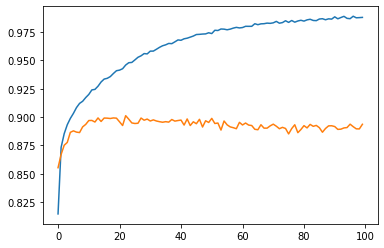

In [ ]:
plt.plot(acc_train)
plt.plot(acc_test)
plt.show()

## 1.5 Агументация данных и регулряизации нейросети

Попобуйте добавить аугументацию (случайные повороты, увеличение, уменьшение) в данные, а также регуляризацию (Drop out и Batch Norm слои) в модель. Как меняется метрика accuracy на обучающей и тестовой выборке в процессе обучения? Постройте график.

In [ ]:
# Build the neural network, expand on top of nn.Module
class CNN_dropout(nn.Module):
  def __init__(self):
    super().__init__()

    # define layers
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
        nn.BatchNorm2d(6),
        nn.ReLU(),
        nn.Dropout(0.15),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5),
        nn.BatchNorm2d(12),
        nn.ReLU(),
        nn.Dropout(0.15),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )

    self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=60)
    self.out = nn.Linear(in_features=60, out_features=10)
    self.dropout = nn.Dropout(0.25)

  # define forward function
  def forward(self, t):
    t = self.conv1(t)
    t = self.conv2(t)

    # fc1
    t = t.reshape(-1, 12*4*4)
    t = self.fc1(t)
    t = self.dropout(t)
    t = F.relu(t)
    t = self.dropout(t)

    # fc2
    t = self.fc2(t)
    t = self.dropout(t)
    t = F.relu(t)
    t = self.dropout(t)

    # output
    t = self.out(t)
    # don't need softmax here since we'll use cross-entropy as activation.

    return t

In [ ]:
train_set = torchvision.datasets.FashionMNIST(
    root = 'data_train',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
        transforms.RandomAutocontrast(p=0.5),
        transforms.RandomRotation(15)
    ])
)

test_set = torchvision.datasets.FashionMNIST(
    root = 'data_test',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
        transforms.RandomAutocontrast(p=0.5),
        transforms.RandomRotation(15)
    ])
)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=True)

## 1.6 Обучение нейросети на данных с аугументацией 

In [ ]:
model = CNN_dropout()
model.cuda()

CNN_dropout(
  (conv1): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.15, inplace=False)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.15, inplace=False)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch.device(device)

acc_train = []
acc_test = []

for epoch in range(epochs):
  accuracy = 0
  for batch in train_loader:
      images = batch[0].to(device)
      labels = batch[1].to(device)
      preds = model(images)
      loss = F.cross_entropy(preds, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      accuracy += torch.sum(preds.argmax(1) == labels)
  acc_train.append(accuracy / len(train_set))

  accuracy = 0
  for batch in test_loader:
      images = batch[0].to(device)
      labels = batch[1].to(device)
      preds = model(images)
      accuracy += torch.sum(preds.argmax(1) == labels)
  acc_test.append(accuracy / len(test_set))
  print(f"Epoch {epoch} is done.")

Epoch 0 is done.
Epoch 1 is done.
Epoch 2 is done.
Epoch 3 is done.
Epoch 4 is done.
Epoch 5 is done.
Epoch 6 is done.
Epoch 7 is done.
Epoch 8 is done.
Epoch 9 is done.
Epoch 10 is done.
Epoch 11 is done.
Epoch 12 is done.
Epoch 13 is done.
Epoch 14 is done.
Epoch 15 is done.
Epoch 16 is done.
Epoch 17 is done.
Epoch 18 is done.
Epoch 19 is done.
Epoch 20 is done.
Epoch 21 is done.
Epoch 22 is done.
Epoch 23 is done.
Epoch 24 is done.
Epoch 25 is done.
Epoch 26 is done.
Epoch 27 is done.
Epoch 28 is done.
Epoch 29 is done.
Epoch 30 is done.
Epoch 31 is done.
Epoch 32 is done.
Epoch 33 is done.
Epoch 34 is done.
Epoch 35 is done.
Epoch 36 is done.
Epoch 37 is done.
Epoch 38 is done.
Epoch 39 is done.
Epoch 40 is done.
Epoch 41 is done.
Epoch 42 is done.
Epoch 43 is done.
Epoch 44 is done.
Epoch 45 is done.
Epoch 46 is done.
Epoch 47 is done.
Epoch 48 is done.
Epoch 49 is done.
Epoch 50 is done.
Epoch 51 is done.
Epoch 52 is done.
Epoch 53 is done.
Epoch 54 is done.
Epoch 55 is done.
Ep

In [ ]:
acc_test = np.array([a.cpu() for a in acc_test])
acc_train = np.array([a.cpu() for a in acc_train])

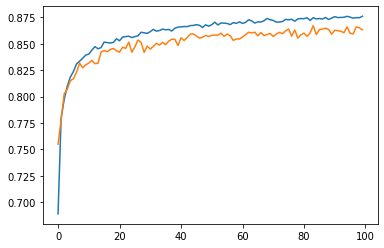

In [ ]:
plt.plot(acc_train)
plt.plot(acc_test)
plt.show()

## 1.7 Выводы

Что удалось попробовать? Что получилось, а что — нет? Повлияло ли добавление аугументации на качество?

Получилось реализовать свёрточную нейросеть, и реализовать архитектуру с dropout + batchnorm, а также проверить действие случайных преобразований датасета. Видим, что в результате сеть стала менее переобученной, но не дала прироста accuracy и на тестовой выборке. Возможно, увеличение learning rate позволит улучшить результат.

# 2. Рекуррентная нейронная сеть для генерации текстов (9 баллов)

Семинар
https://colab.research.google.com/drive/12fwFCVNHOb9Vtw_tZIQiTJLlbuHu-bLD?usp=sharing

## 2.1 Загрузка данных



In [ ]:
from google.colab import drive
from collections import Counter
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
from torch.autograd import Variable
import unicodedata
import string
import glob
import random
import argparse

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/Colab\ Notebooks/M_stihi.csv .

## 2.2 Преодбработка/нормализация данных по необходимости

Например, можно привести все слова к нижнему регистру

In [ ]:
import unicodedata
import string

data = pd.read_csv('/content/M_stihi.csv')
data.head()

,author,text
0,Марина Копсергенова,\r\nДетки мои Живите неспеша чтоб пела ...
1,Владислав Иванов 13,Каждый по своему проводит свою ночь\r\nКто спи...
2,Лия Эль,Нежно так я словами касался предплечий\r\nИх ...
3,Елена Кедровая Шишка,Ты как всегда меня поймешь\r\nИ как всегда ...
4,Леонид Хегай,Укусить бы кого нибудь больно\r\nиль повыть п...


In [ ]:
import torch
import pandas as pd
from collections import Counter

class Dataset(torch.utils.data.Dataset):
    def __init__(
        self,
        args,
    ):
        self.args = args
        self.words = self.load_words()
        self.uniq_words = self.get_uniq_words()

        self.index_to_word = {index: word for index, word in enumerate(self.uniq_words)}
        self.word_to_index = {word: index for index, word in enumerate(self.uniq_words)}

        self.words_indexes = [self.word_to_index[w] for w in self.words]

    def load_words(self):
        train_df = pd.read_csv('M_stihi.csv')
        # Слова в нижний регистр
        train_df['text'].apply(lambda x: x.lower())
        text = train_df['text'].str.cat(sep=' ')
        return text.split(' ')

    def get_uniq_words(self):
        word_counts = Counter(self.words)
        return sorted(word_counts, key=word_counts.get, reverse=True)

    def __len__(self):
        return len(self.words_indexes) - self.args.sequence_length

    def __getitem__(self, index):
        return (
            torch.tensor(self.words_indexes[index:index+self.args.sequence_length]),
            torch.tensor(self.words_indexes[index+1:index+self.args.sequence_length+1]),
        )

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--max-epochs', type=int, default=10)
parser.add_argument('--batch-size', type=int, default=32)
parser.add_argument('--sequence-length', type=int, default=4)
args = parser.parse_args(args=[])

dataset = Dataset(args)

## 2.3 Инициализация объекта рекуррентной нейронной сети

In [ ]:
import torch
from torch import nn

class Model(nn.Module):
    def __init__(self, dataset):
        super(Model, self).__init__()
        self.lstm_size = 64
        self.embedding_dim = 64
        self.num_layers = 3

        n_vocab = len(dataset.uniq_words)
        self.embedding = nn.Embedding(
            num_embeddings=n_vocab,
            embedding_dim=self.embedding_dim,
        )
        self.lstm = nn.LSTM(
            input_size=self.lstm_size,
            hidden_size=self.lstm_size,
            num_layers=self.num_layers,
            dropout=0.2,
        )
        self.fc = nn.Linear(self.lstm_size, n_vocab)

    def forward(self, x, prev_state):
        embed = self.embedding(x)
        output, state = self.lstm(embed, prev_state)
        logits = self.fc(output)
        return logits, state

    def init_state(self, sequence_length):
        return (torch.zeros(self.num_layers, sequence_length, self.lstm_size),
                torch.zeros(self.num_layers, sequence_length, self.lstm_size))

model = Model(dataset)
# model.cuda()

## 2.4 Обучение обычной рекуррентной нейронной сети

In [ ]:
import argparse
import torch
import numpy as np
from torch import nn, optim
from torch.utils.data import DataLoader
from os.path import exists

def train(dataset, model, args):
    fname = '/content/drive/MyDrive/Colab Notebooks/model.pth'
    file_exists = exists(fname)
    if file_exists:
        model.load_state_dict(torch.load(fname))


    Current_epoch = 0
    Current_batch = 469
    model.train()

    
    dataloader = DataLoader(dataset, batch_size=args.batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(args.max_epochs):
        if Current_epoch != epoch:
            continue 

        state_h, state_c = model.init_state(args.sequence_length)
        #state_h = state_h.to('cuda:0')
        #state_c = state_c.to('cuda:0')

        for batch, (x, y) in enumerate(dataloader):
            if Current_batch != batch + 1:
                continue
            optimizer.zero_grad()
            #x = x.to('cuda:0')
            #y = y.to('cuda:0')

            y_pred, (state_h, state_c) = model(x, (state_h, state_c))
            loss = criterion(y_pred.transpose(1, 2), y)

            state_h = state_h.detach()
            state_c = state_c.detach()

            loss.backward()
            optimizer.step()

            torch.save(model.state_dict(),  fname)
            print({ 'epoch': epoch, 'batch': batch, 'loss': loss.item() })
            Current_batch += 1
        Current_batch = 0
        Current_epoch += 1

train(dataset, model, args)

RuntimeError: ignored

## 2.5 Генерация текстов при помощи обычной рекуррентной сети

In [ ]:
def predict(dataset, model, text, next_words=100):
    model.eval()

    words = text.split(' ')
    state_h, state_c = model.init_state(len(words))

    for i in range(0, next_words):
        x = torch.tensor([[dataset.word_to_index[w] for w in words[i:]]])
        y_pred, (state_h, state_c) = model(x, (state_h, state_c))

        last_word_logits = y_pred[0][-1]
        p = torch.nn.functional.softmax(last_word_logits, dim=0).detach().numpy()
        word_index = np.random.choice(len(last_word_logits), p=p)
        words.append(dataset.index_to_word[word_index])

    return words

fname = '/content/drive/MyDrive/Colab Notebooks/model.pth'
model = Model(dataset)
model.load_state_dict(torch.load(fname))
print(predict(dataset, model, text='тук тук. кто там?'))

RuntimeError: ignored

In [ ]:
print(predict(dataset, model, text='началось дело было так...'))

In [ ]:
print(predict(dataset, model, text='жили были дед да бабка.'))

In [ ]:
print(predict(dataset, model, text='сидел как-то колобок'))

In [ ]:
print(predict(dataset, model, text='кто в лес'))

## 2.6 Обучение рекуррентной нейронной сети с LSTM-ячейками

## 2.7 Генерация текстов с разной температурой

Попробуйте сгенерировать тексты с температурой из списка: `[0.1, 0.2, 0.4, 0.6, 0.8, 1.0]` (см. нотубук с семинара по RNN)

В ноутбуке по RNN нет температуры..

## 2.8 Выводы